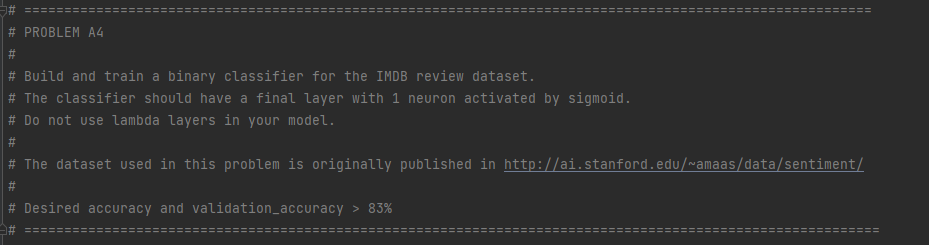

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def solution_A4():
    imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
    # YOUR CODE HERE
    train_data, test_data = imdb['train'], imdb['test']
    training_sentences = []
    training_labels = []
    testing_sentences = []
    testing_labels = []
    # DO NOT CHANGE THIS CODE
    for s, l in train_data:
        training_sentences.append(s.numpy().decode('utf8'))
        training_labels.append(l.numpy())

    for s, l in test_data:
        testing_sentences.append(s.numpy().decode('utf8'))
        testing_labels.append(l.numpy())

    # YOUR CODE HERE
    training_label_final = np.array(training_labels)
    testing_label_final = np.array(testing_labels)
    # DO NOT CHANGE THIS CODE
    # Make sure you used all of these parameters or test may fail
    vocab_size = 10000
    embedding_dim = 16
    max_length = 120
    trunc_type = 'post'
    oov_tok = "<OOV>"

    # Fit your tokenizer with training data
    tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
    tokenizer.fit_on_texts(training_sentences)
    word_index = tokenizer.word_index
    sequences = tokenizer.texts_to_sequences(training_sentences)
    padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type) # YOUR CODE HERE

    model = tf.keras.Sequential([
        # YOUR CODE HERE. Do not change the last layer.
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    num_epochs = 10
    model.fit(padded, training_label_final, epochs=num_epochs, validation_data=(testing_padded, testing_label_final))
    return model


In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_A4()
    model.save("model_A4.h5")

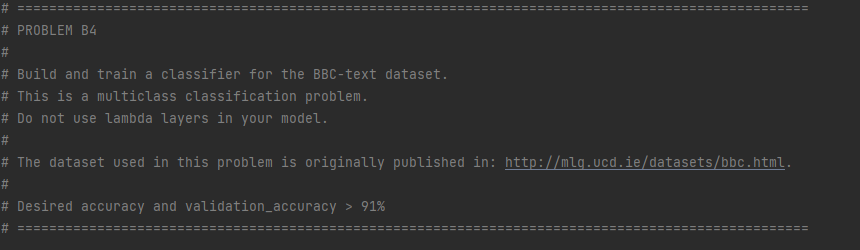

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
def train_val_split(sentences, labels, training_split):
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[0:train_size]
    train_labels = labels[0:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    return train_sentences, validation_sentences, train_labels, validation_labels

def tokenize_labels(all_labels, split_labels):
    # Instantiate the Tokenizer (no additional arguments needed)
    label_tokenizer = Tokenizer()

    # Fit the tokenizer on all the labels
    label_tokenizer.fit_on_texts(all_labels)

    # Convert labels to sequences
    label_seq = label_tokenizer.texts_to_sequences(split_labels)

    # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
    label_seq_np = np.array(label_tokenizer.texts_to_sequences(split_labels)) - 1

    return label_seq_np

def solution_B4():
    bbc = pd.read_csv(
        'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/bbc-text.csv')

    # DO NOT CHANGE THIS CODE
    # Make sure you used all of these parameters or you can not pass this test
    vocab_size = 1000
    embedding_dim = 16
    max_length = 120
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = "<OOV>"
    training_portion = .8

    # YOUR CODE HERE
    # Using "shuffle=False"
    bbc_texts, bbc_labels = bbc['text'], bbc['category']
    np_labels = np.array(bbc_labels)
    training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(bbc_texts, bbc_labels,
                                                                                              test_size=1.0 - training_portion,
                                                                                              shuffle=False)
    # Fit your tokenizer with training data
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)
    word_index = tokenizer.word_index # YOUR CODE HERE

    sequences = tokenizer.texts_to_sequences(training_sentences)

    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

    padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

    testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

    train_label_seq = tokenize_labels(bbc_labels, training_labels)
    test_label_seq = tokenize_labels(bbc_labels, testing_labels)

    model = tf.keras.Sequential([
        # YOUR CODE HERE.
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        # YOUR CODE HERE. DO not change the last layer or test may fail
        tf.keras.layers.Dense(6, activation='softmax')
    ])

    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        print(logs.get('accuracy'))
        if((logs.get('accuracy') > 0.91) and (logs.get('val_accuracy')>0.91)):
          self.model.stop_training = True

    callbacks = myCallback()

    # Make sure you are using "sparse_categorical_crossentropy" as a loss fuction
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(padded, train_label_seq, epochs=100, batch_size=32, verbose=1,
              validation_data=(testing_padded, test_label_seq), callbacks=[callbacks])

    return model

In [ ]:

    # The code below is to save your model as a .h5 file.
    # It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_B4()
    model.save("model_B4.h5")

Epoch 1/100
56/56 [==============================] - 1s 5ms/step - loss: 1.7668 - accuracy: 0.2736 - val_loss: 1.7325 - val_accuracy: 0.3820
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 1.7030 - accuracy: 0.3494 - val_loss: 1.6574 - val_accuracy: 0.2719
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 1.6271 - accuracy: 0.2685 - val_loss: 1.5809 - val_accuracy: 0.2854
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 1.5417 - accuracy: 0.3197 - val_loss: 1.4901 - val_accuracy: 0.4584
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 1.4275 - accuracy: 0.4983 - val_loss: 1.3646 - val_accuracy: 0.6000
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 1.2762 - accuracy: 0.6331 - val_loss: 1.2107 - val_accuracy: 0.6876
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.7719 - val_loss: 1.0396 - val_accuracy: 0.7393
Epoch 8/100
5

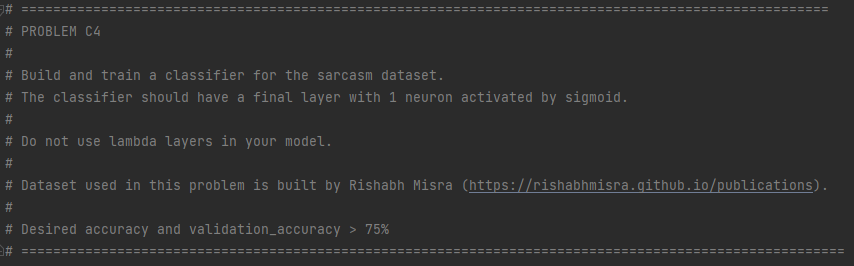

In [ ]:
import json
import tensorflow as tf
import numpy as np
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def solution_C4():
    data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/sarcasm.json'
    urllib.request.urlretrieve(data_url, 'sarcasm.json')

    # DO NOT CHANGE THIS CODE
    # Make sure you used all of these parameters or test may fail
    vocab_size = 1000
    embedding_dim = 16
    max_length = 120
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = "<OOV>"
    training_size = 20000

    sentences = []
    labels = []
    # YOUR CODE HERE
    with open("sarcasm.json", 'r') as j:
        sarcasm = json.load(j)

    for item in sarcasm:
        sentences.append(item['headline'])
        labels.append(item['is_sarcastic'])

    training_sentences = sentences[0:training_size]
    testing_sentences = sentences[training_size:]
    training_labels = labels[0:training_size]
    testing_labels = labels[training_size:]
    # Fit your tokenizer with training data
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences) # YOUR CODE HERE
    word_index = tokenizer.word_index # YOUR CODE HERE

    training_sequences = tokenizer.texts_to_sequences(training_sentences)
    training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
    testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    training_padded = np.array(training_padded)
    training_labels = np.array(training_labels)
    testing_padded = np.array(testing_padded)
    testing_labels = np.array(testing_labels)

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(6, activation='relu'),
        # YOUR CODE HERE. DO not change the last layer or test may fail
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(training_padded, training_labels, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_C4()
    model.save("model_C4.h5")

Epoch 1/50
625/625 [==============================] - 3s 3ms/step - loss: 0.6842 - accuracy: 0.5607 - val_loss: 0.6781 - val_accuracy: 0.5633
Epoch 2/50
625/625 [==============================] - 2s 3ms/step - loss: 0.6650 - accuracy: 0.5623 - val_loss: 0.6355 - val_accuracy: 0.5773
Epoch 3/50
625/625 [==============================] - 2s 2ms/step - loss: 0.6004 - accuracy: 0.6679 - val_loss: 0.5471 - val_accuracy: 0.7587
Epoch 4/50
625/625 [==============================] - 2s 2ms/step - loss: 0.5350 - accuracy: 0.7531 - val_loss: 0.4933 - val_accuracy: 0.7948
Epoch 5/50
625/625 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.7806 - val_loss: 0.4646 - val_accuracy: 0.8027
Epoch 6/50
625/625 [==============================] - 2s 2ms/step - loss: 0.4749 - accuracy: 0.7906 - val_loss: 0.4480 - val_accuracy: 0.8052
Epoch 7/50
625/625 [==============================] - 2s 2ms/step - loss: 0.4570 - accuracy: 0.8011 - val_loss: 0.4370 - val_accuracy: 0.8085
Epoch 